# Under the hood

In the previous tutorials, we explored how the simulator generates decodable multivariate data. But what does the multivariate data look like at individual channels? In this section, we will examine the simulator's mechanisms and explore how data is generated.

## 1. Setting up the simulation

We will use similar parameters as before, but with a few modifications for simplicity. We will simulate one subject with a simple design (one condition `Category`) and high amplitude.

In [1]:
import numpy as np
import pandas as pd

# Simple design matrix: one condition with two levels (1 and -1)
X = np.array([[1, 1, -1, -1] * 40]).T

# Add descriptors:
X = pd.DataFrame(X, columns=["category"])
mapping = {"category": {1: "face", -1: "object"}}

# Specify a strong effect
effects = [{"condition": "category", "windows": [0.1, 0.2], "effect_amp": 2}]

# Data parameters:
noise_std = 1 / 2  # 25% of the effect amplitude
ch_cov = None  # Assuming that the data of each sensor are independent
sfreq = 200  # Simulating data at 200Hz
tmin = 0
tmax = 0.3
n_subjects = 1

## 2. Effects in a single channel

Let's examine the simplest case: simulating data for one channel. In this scenario, effect amplitudes are concentrated in the single channel, resulting in opposing amplitudes for the two levels of the condition.

In [2]:
from multisim import Simulator
from matplotlib import pyplot as plt

n_channels = 1  # Simulating data for one channel
sims = Simulator(
    X,  # Design matrix
    effects,  # Effects to simulate
    noise_std,  # Observation noise
    n_channels,  # Number of channelss
    n_subjects,  # Number of subjects
    tmin,
    tmax,  # Start and end of epochs
    sfreq,  # Sampling frequency of the data
    ch_cov=ch_cov,  # Spatial covariance of the data
    random_state=42,  # Random state for reproducibility
)
# Export to MNE for easy plotting
epochs = sims.export_to_mne(X=X.copy(), mapping=mapping)[0]  # First and only subject

When grouping `face` (`category=1`) vs `object` (`category=-1`) trials, we can see that the channel shows opposing amplitudes in the 0.1 to 0.2 seconds time window. The mean amplitude of the effect is 2V as specified by `effect_amp` in the `effects` parameter.

Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\2538219122.py:5: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[1]].plot_image(


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\2538219122.py:12: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[-1]].plot_image(


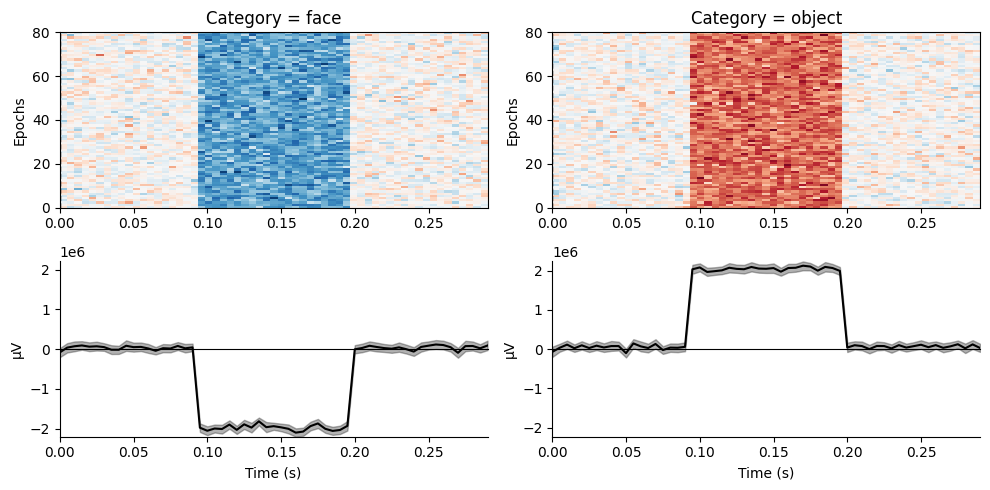

[<Figure size 1000x500 with 4 Axes>]

In [ ]:
# Plot the category = 1 and category = -1 effects:
X_category = X.groupby("category")

fig, axes = plt.subplots(2, 2, figsize=(10, 5), tight_layout=True)
epochs[X_category.groups[1]].plot_image(
    picks=[0],
    colorbar=False,
    title="Category = face",
    axes=axes[:, 0],
    show=False,
)
epochs[X_category.groups[-1]].plot_image(
    picks=[0], colorbar=False, title="Category = object", axes=axes[:, 1]
)

<div class="alert alert-info"><h4>Warning</h4><p>
Precisely because the effects are reduced to different amplitudes in a single channel, the data is not <b>multi</b>-variate per se. While this could still serve as a benchmark for single-channel decoding, it could lead to unexpected temporal generalization if you want to simulate multiple effects on the same condition (see <a href="05_temporal_generalization.ipynb">previous tutorial</a>). This is because when generating data, the channel weight is first randomly generated from a standard normal distribution and then normalized according to the effect amplitude. Therefore, it is likely that the channel happens to have the same pattern (e.g., face+, object-) for multiple effects, which would lead to a temporal generalization pattern.
</p></div>

## 3. Multivariate data

As its name suggests, MultiSim is designed to generate multivariate data. In this section, we will simulate data for 5 channels and observe how the pattern is distributed across channels.

Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\499238379.py:19: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[1]].plot_image(


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\499238379.py:26: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[-1]].plot_image(


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\499238379.py:19: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[1]].plot_image(


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\499238379.py:26: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[-1]].plot_image(


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\499238379.py:19: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[1]].plot_image(


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\499238379.py:26: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[-1]].plot_image(


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\499238379.py:19: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[1]].plot_image(


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\499238379.py:26: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[-1]].plot_image(


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\499238379.py:19: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[1]].plot_image(


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_20528\499238379.py:26: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[-1]].plot_image(


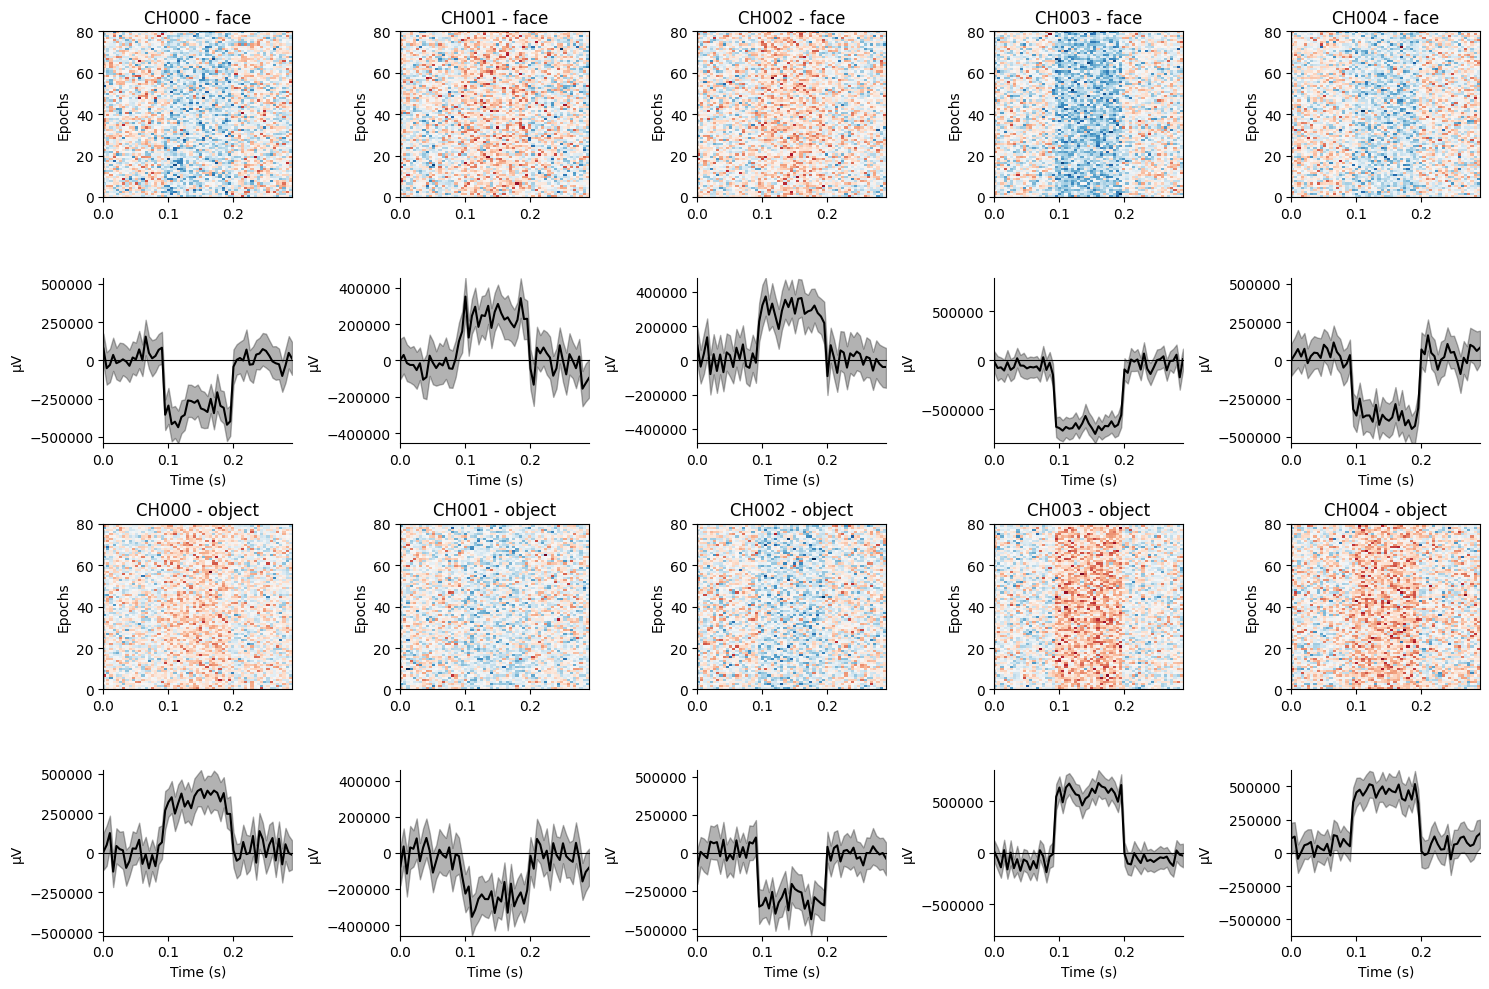

In [4]:
n_channels = 5
sims = Simulator(
    X,
    effects,
    noise_std,
    n_channels,
    n_subjects,
    tmin,
    tmax,
    sfreq,
    ch_cov=ch_cov,
    random_state=42,
)
epochs = sims.export_to_mne(X=X.copy(), mapping=mapping)[0]

fig, axes = plt.subplots(4, 5, figsize=(15, 10), tight_layout=True)
# Plot mean data for each channel in category = 1 (face) trials
for i in range(n_channels):
    epochs[X_category.groups[1]].plot_image(
        picks=[i],
        colorbar=False,
        title=epochs.info["ch_names"][i] + " - face",
        axes=axes[0:2, i],
        show=False,
    )
    epochs[X_category.groups[-1]].plot_image(
        picks=[i],
        colorbar=False,
        title=epochs.info["ch_names"][i] + " - object",
        axes=axes[2:4, i],
        show=False,
    )
plt.show()

The results show that some channels exhibit positive amplitudes for `face` trials, while others show negative amplitudes. Conversely, the opposite amplitudes are consistently observed for `object` trials. Notably, the amplitude at each channel is much smaller than the effect amplitude specified, as the effect is distributed across multiple channels.

As shown in these examples, the simulator injects a signal of a particular amplitude for each condition and channel at the specified time points. The amplitude in each channel and condition is chosen at random, but remains the same across all trials of each condition, thereby yielding a robust across-channels pattern that classifiers can detect. In the [next tutorial](07-mathematical_details.ipynb), we provide the full mathematical details of how the simulation works.